## API Mini Project
The API mini project asks us to use the request package to pull data from the quandle API and convert the response to a data structure apprpriate for data analysis.  We are discouraged from using packages such as pandas, and are instead encouraged to use the standard library.  The assignment asks to calculate a few statistics using time series data from the Frankfurt stick exchange.  We are going to pull the full year 2017 financial data for a company called Carl Zeiss Meditec, that produces medical equipment for ophthalmologists. Being that I am more comfortable using pandas, I will perform the analysis as suggested with the standard library, but also supplement that using pandas as a means to cross-reference answers. We are asked to perform the following tasks:

1. Convert the returned JSON object into a Python dictionary.
2. Calculate what the highest and lowest opening prices were for the stock in this period.
3. What was the largest change in any one day (based on High and Low price)?
4. What was the largest change between any two days (based on Closing Price)?
5. What was the average daily trading volume during this year?
6. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

In [29]:
#import required packages
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['patch.force_edgecolor'] = True
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
#assign test url for testing, url for full dataset, and API key
API_KEY = ''
URL_TEST = 'https://www.quandl.com/api/v3/datasets/FSE/AFX_X.json?start_date=2020-04-22&end_date=2020-04-23&api_key='+API_KEY
URL = 'https://www.quandl.com/api/v3/datasets/FSE/AFX_X.json?start_date=2017-01-01&end_date=2017-12-31&api_key='+API_KEY

In [3]:
#print test data to inspect structure of request response
t_res = requests.get(URL_TEST)
print(t_res)
print(t_res.text)

<Response [200]>
{"dataset":{"id":10095370,"dataset_code":"AFX_X","database_code":"FSE","name":"Carl Zeiss Meditec (AFX_X)","description":"Stock Prices for Carl Zeiss Meditec (2020-04-14) from the Frankfurt Stock Exchange.\u003cbr\u003e\u003cbr\u003eTrading System: Xetra\u003cbr\u003e\u003cbr\u003eISIN: DE0005313704","refreshed_at":"2020-04-27T22:16:40.903Z","newest_available_date":"2020-04-27","oldest_available_date":"2000-06-07","column_names":["Date","Open","High","Low","Close","Change","Traded Volume","Turnover","Last Price of the Day","Daily Traded Units","Daily Turnover"],"frequency":"daily","type":"Time Series","premium":false,"limit":null,"transform":null,"column_index":null,"start_date":"2020-04-22","end_date":"2020-04-23","data":[["2020-04-23",94.75,95.5,92.7,94.8,null,123862.0,11684265.45,null,null,null],["2020-04-22",92.75,94.65,91.6,94.65,null,126830.0,11898048.5,null,null,null]],"collapse":null,"order":null,"database_id":6129}}


In [4]:
#convert response to json object and print sample
sample = t_res.json()
sample

{'dataset': {'id': 10095370,
  'dataset_code': 'AFX_X',
  'database_code': 'FSE',
  'name': 'Carl Zeiss Meditec (AFX_X)',
  'description': 'Stock Prices for Carl Zeiss Meditec (2020-04-14) from the Frankfurt Stock Exchange.<br><br>Trading System: Xetra<br><br>ISIN: DE0005313704',
  'refreshed_at': '2020-04-27T22:16:40.903Z',
  'newest_available_date': '2020-04-27',
  'oldest_available_date': '2000-06-07',
  'column_names': ['Date',
   'Open',
   'High',
   'Low',
   'Close',
   'Change',
   'Traded Volume',
   'Turnover',
   'Last Price of the Day',
   'Daily Traded Units',
   'Daily Turnover'],
  'frequency': 'daily',
  'type': 'Time Series',
  'premium': False,
  'limit': None,
  'transform': None,
  'column_index': None,
  'start_date': '2020-04-22',
  'end_date': '2020-04-23',
  'data': [['2020-04-23',
    94.75,
    95.5,
    92.7,
    94.8,
    None,
    123862.0,
    11684265.45,
    None,
    None,
    None],
   ['2020-04-22',
    92.75,
    94.65,
    91.6,
    94.65,
    None

In [6]:
#pull year 2017 financial data and verify response, object type and length

response = requests.get(URL)
y_2017 = response.json()
print(response)
print(type(y_2017))
print(len(y_2017['dataset']['data']))

<Response [200]>
<class 'dict'>
255


In [7]:
#extract keys from column names and pull relevant data from the response
#create a list, dictionary, that aggregates data into the correct form using for loop

columns = y_2017['dataset']['column_names']
data = y_2017['dataset']['data']

dictionary = []
for data in data:
    dictionary.append(dict(zip(columns,data)))

In [8]:
#Inspect dictionary
dictionary[0:3]

[{'Date': '2017-12-29',
  'Open': 51.76,
  'High': 51.94,
  'Low': 51.45,
  'Close': 51.76,
  'Change': None,
  'Traded Volume': 34640.0,
  'Turnover': 1792304.0,
  'Last Price of the Day': None,
  'Daily Traded Units': None,
  'Daily Turnover': None},
 {'Date': '2017-12-28',
  'Open': 51.65,
  'High': 51.82,
  'Low': 51.43,
  'Close': 51.6,
  'Change': None,
  'Traded Volume': 40660.0,
  'Turnover': 2099024.0,
  'Last Price of the Day': None,
  'Daily Traded Units': None,
  'Daily Turnover': None},
 {'Date': '2017-12-27',
  'Open': 51.45,
  'High': 51.89,
  'Low': 50.76,
  'Close': 51.82,
  'Change': None,
  'Traded Volume': 57452.0,
  'Turnover': 2957018.0,
  'Last Price of the Day': None,
  'Daily Traded Units': None,
  'Daily Turnover': None}]

In [9]:
#Notice that the date is in reversed order with the last day of 2017 first in the list.  This will not affect analysis for the questions asked however,
#it makes for sense for the dates to be listed in the correct order.

dictionary = dictionary[::-1]

In [10]:
#inspect reordered dictionary
dictionary[0:3]

[{'Date': '2017-01-02',
  'Open': 34.99,
  'High': 35.94,
  'Low': 34.99,
  'Close': 35.8,
  'Change': None,
  'Traded Volume': 44700.0,
  'Turnover': 1590561.0,
  'Last Price of the Day': None,
  'Daily Traded Units': None,
  'Daily Turnover': None},
 {'Date': '2017-01-03',
  'Open': 35.9,
  'High': 35.93,
  'Low': 35.34,
  'Close': 35.48,
  'Change': None,
  'Traded Volume': 70618.0,
  'Turnover': 2515473.0,
  'Last Price of the Day': None,
  'Daily Traded Units': None,
  'Daily Turnover': None},
 {'Date': '2017-01-04',
  'Open': 35.48,
  'High': 35.51,
  'Low': 34.75,
  'Close': 35.19,
  'Change': None,
  'Traded Volume': 54408.0,
  'Turnover': 1906810.0,
  'Last Price of the Day': None,
  'Daily Traded Units': None,
  'Daily Turnover': None}]

In [11]:
#create lists of relevant data using list comprehensions to evaluate queries

opens = [dictionary[i]['Open'] for i in range(0,254)]
high = [dictionary[i]['High'] for i in range(0,254)]
low = [dictionary[i]['Low'] for i in range(0,254)]
close = [dictionary[i]['Close'] for i in range(0,254)]
volume = [dictionary[i]['Traded Volume'] for i in range(0,254)]

In [13]:
#previous inspection has shown that there is missing values in the opens list. We need to remove these prior to calculating the max open price. Afterwhich
#we can calculate the max/min open prices and average daily trading volume

open1 = [i for i in opens if i]
print(f'The highest opening price in 2017 was ${max(open1)}. The lowest opening price of 2017 was ${min(open1)}')
print(f'The average daily trading volume for the year 2017 was {round(sum(volume)/len(volume),2)} units')

The highest opening price in 2017 was $53.11. The lowest opening price of 2017 was $34.0
The average daily trading volume for the year 2017 was 89338.84 units


In [14]:
#create a list to store values of largest daily fluctuation between high and low price, then determine largest daily price delta

diff = []
for i in range(0,254):
    diff.append(round(dictionary[i]['High']-dictionary[i]['Low'],4))
    
print(f'The largest price change in any one day in 2017 was ${max(diff)}')

The largest price change in any one day in 2017 was $2.81


In [15]:
#create list to store values for largest day over day price change based on closing price

diff_between_days = []
for i in range(0,254):
    diff_between_days.append(round(dictionary[i]['Close']-dictionary[i+1]['Close'],4))
    
magnitude = [abs(ele) for ele in diff_between_days]
print(f'The largest change between any two days in 2017 was ${max(magnitude)}')

The largest change between any two days in 2017 was $2.56


In [19]:
#define user created function to determine the median value of trading volume for 2017

def median(volume_list):
    n = len(volume_list)
    volume_list.sort()

    if n % 2 == 0:
        median1 = volume[n//2]
        median2 = volume[n//2 - 1]
        median = (median1 + median2)/2
    else:
        median = volume[n//2]
    print(f'The median daily volume traded for the year 2017 is {median} units')
    
    
#execute median function
median(volume)

The median daily volume traded for the year 2017 is 76443.0 units


Text(0.5, 1.0, 'Opening Price of AFX_X for year 2017')

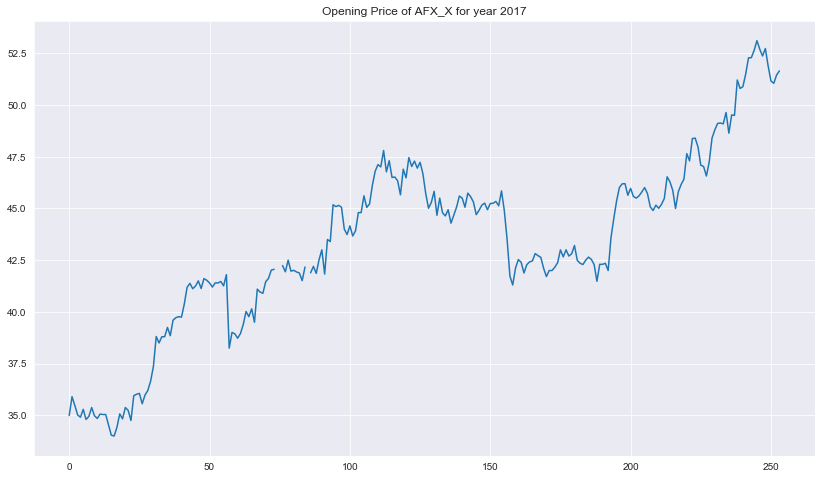

In [55]:
#Create visualizations using financial data
plt.figure(figsize=(14,8))
plt.plot(opens)
plt.title('Opening Price of AFX_X for year 2017')


Text(0.5, 1.0, 'Daily AFX_X Trading Volume: 2017')

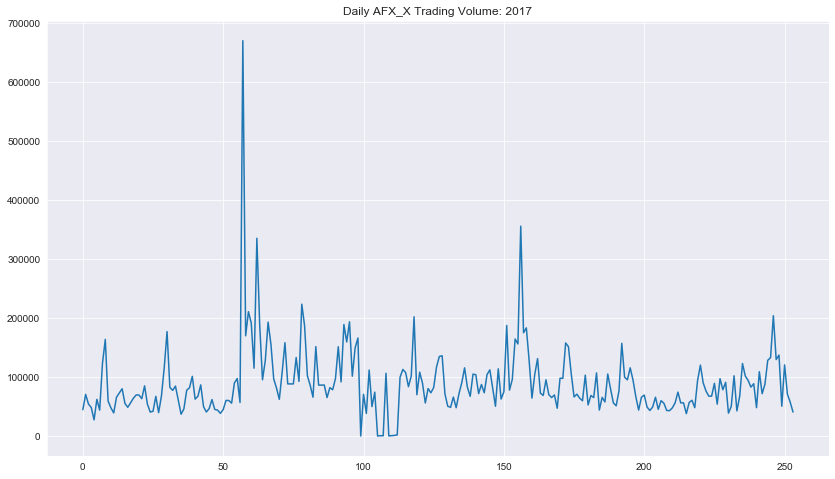

In [56]:
r_volume = [dictionary[i]['Traded Volume'] for i in range(0,254)]
plt.figure(figsize=(14,8))
plt.plot(r_volume)
plt.title('Daily AFX_X Trading Volume: 2017')

## Using the pandas package

In an effort to validate the analysis from above, I am using the pandas package to perform the same anaylsis to cross-reference the answers. I also included two visualizations: one showing the open price with 5 and 10 day rolling means, and another showing the daily trading volume.

In [44]:
import pandas as pd
data1 = y_2017['dataset']['data']
df = pd.DataFrame(data = data1,columns=columns)

In [45]:
df = df.drop(['Last Price of the Day','Daily Traded Units','Daily Turnover'],axis=1)

#reverse index
df = df[::-1]

#construct meaningful index by replace the range index with the date column
df = df.set_index('Date')

df.head()

,Open,High,Low,Close,Change,Traded Volume,Turnover
Date,,,,,,,
2017-01-02,34.99,35.94,34.99,35.80,NaN,44700.0,1590561.0
2017-01-03,35.90,35.93,35.34,35.48,NaN,70618.0,2515473.0
2017-01-04,35.48,35.51,34.75,35.19,NaN,54408.0,1906810.0
2017-01-05,35.02,35.20,34.73,35.06,NaN,48412.0,1692326.0
2017-01-06,34.91,35.21,34.91,35.04,NaN,27507.0,964046.0


In [46]:
max_open = df['Open'].max()
max_open_day = df['Open'].idxmax()
min_open = df['Open'].min()
min_open_day = df["Open"].idxmin()
avg_volume = df['Traded Volume'].sum() / len(df['Traded Volume'])

print(f'The highest open price in 2017 was {max_open}, and occured on {max_open_day}')
print(f'The lowest open price in 2017 was {min_open}, it occured on {min_open_day}')
print(f'The average daily volume traded in 2017 was {round(avg_volume,2)}')

The highest open price in 2017 was 53.11, and occured on 2017-12-14
The lowest open price in 2017 was 34.0, it occured on 2017-01-24
The average daily volume traded in 2017 was 89124.34


In [47]:
df['Two_Change'] = abs(df['Close'].shift(1) - df['Close'])
day_over_day_change = df['Two_Change'].max()
occured = df['Two_Change'].idxmax()

print(f' The two consecutive days in which the closing price changed the most was {occured}, it was a delta of ${round(day_over_day_change,2)}')

 The two consecutive days in which the closing price changed the most was 2017-08-09, it was a delta of $2.56


In [48]:
df['Change'] = df['High'] - df['Low']
max_daily_fluctuation = df['Change'].max()
occured_on = df['Change'].idxmax()

print(f' The largest daily fluctuation in 2017 was ${round(max_daily_fluctuation,2)}, and occured on {occured_on}')

 The largest daily fluctuation in 2017 was $2.81, and occured on 2017-05-11


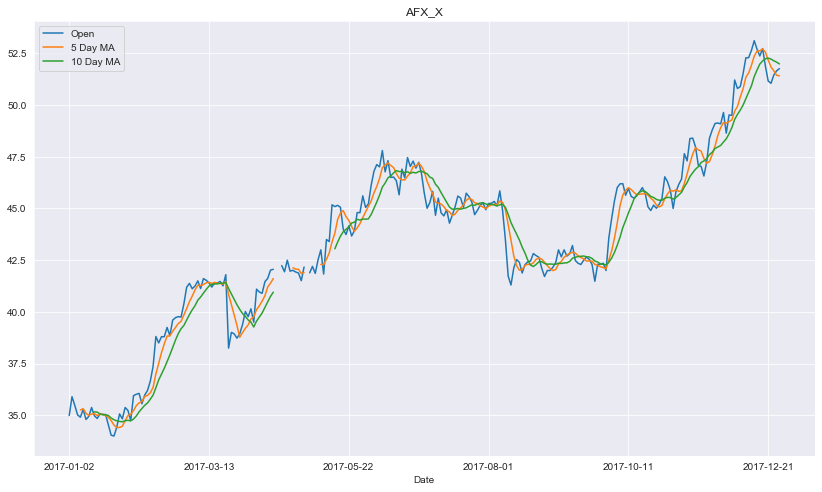

In [54]:
plt.figure(figsize=(14,8))
df['Open'].plot(label='Open')
df['Open'].rolling(5).mean().plot(label='5 Day MA')
df['Open'].rolling(10).mean().plot(label='10 Day MA')
plt.title('AFX_X')
plt.legend(loc='upper left')

Text(0.5, 1.0, 'AFX_X Daily Volume')

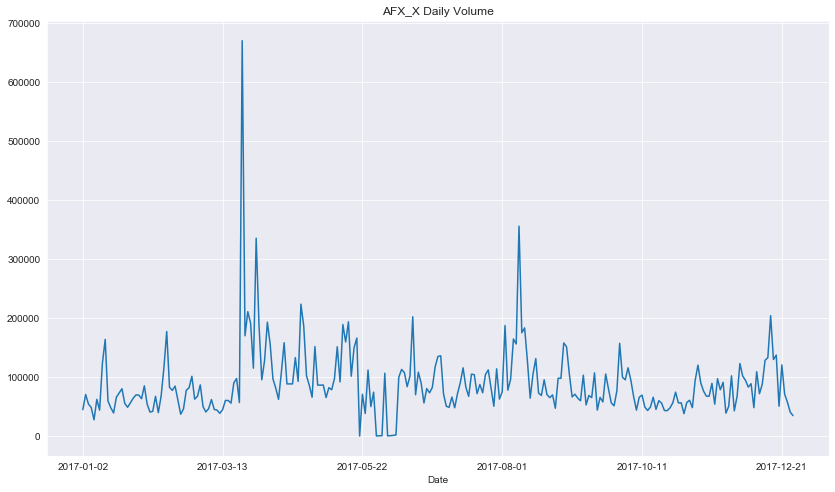

In [53]:
plt.figure(figsize=(14,8))
df['Traded Volume'].plot()
plt.title("AFX_X Daily Volume")